In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import json
import time #to delay exectutions

import cmdstanpy
import arviz as az
az.style.use('arviz-darkgrid')
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.39ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 2.2.1pop0-1628521831-21.10-5dbe6cf is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
cwd = os.getcwd()
stan_directory = '~/.cmdstan/cmdstan-2.29.2'
data_file = 'neutropenia.data.R'
! cat ./data/$data_file

alphaPrior <- 0.002
alphaPriorCV <- 1
amt <- 
c(80000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80000, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 80000,
0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 80000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
circ0Prior <- 5
circ0PriorCV <- 0.2
CLPrior <- 10
CLPriorCV <- 0.5
cmt <- 
c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1)
cObs <- 
c(329.316897447047, 697.320965998204, 740.862512133513, 1205.15076668876,
1257.28101953198, 1185.71416687525, 1169.7063940622, 823.962074043762, 513.274768773849,
346.136959891888, 276.361387949035, 213.601617020019, 173.647272514587, 518.208870321164,
721.525972452254, 8

* amt : 89 (nt) observations 
* cObs : 53 (nObsPK) observations 
* neutObs : 29 (nObsPD) observations

$$\frac{dy_{\mathrm{prol}}}{dt} = k_{\mathrm{prol}} y_{\mathrm{prol}} (1 - E_{drug})(\frac{Circ_0}{y_{\mathrm{circ}}})^\gamma - k_{\mathrm{tr}}y_{\mathrm{prol}} \\
\frac{dy_{\mathrm{\mathrm{tr}ansit1}}}{dt} = k_{\mathrm{tr}} y_{\mathrm{prol}} - k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit1}} \\
\frac{dy_{\mathrm{\mathrm{tr}ansit2}}}{dt} = k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit1}} - k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit2}}  \\
\frac{dy_{\mathrm{\mathrm{tr}ansit3}}}{dt} = k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit2}} - k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit3}}  \\
\frac{dy_{\mathrm{circ}}}{dt} = k_{\mathrm{tr}} y_{\mathrm{\mathrm{tr}ansit3}} - k_{\mathrm{tr}} y_{\mathrm{circ}}$$

where $E_{drug} = \alpha \frac{y_{\mathrm{blood}}}{V_1}$.

The concentration $ c = \frac{y_{\mathrm{central}}}{V_1}$ is modeled with a two compartments model. 

$$\frac{dy_{\mathrm{gut}}}{dt} = -k_a y_{\mathrm{gut}} \\
\frac{dy_{\mathrm{central}}}{dt} = k_a y_{\mathrm{gut}} - (\frac{CL}{V_{\mathrm{1}}} + \frac{Q}{V_{\mathrm{1}}}) y_{\mathrm{central}} +  \frac{Q}{V_{\mathrm{2}}} y_{\mathrm{peri}} \\
\frac{dy_{\mathrm{2}}}{dt} = \frac{Q}{V_{\mathrm{1}}} y_{\mathrm{central}} - \frac{Q}{V_{\mathrm{peri}}} y_{\mathrm{2}}$$

In [168]:
#%%writefile model_neutro.stan

In [3]:
model = 'neutro'
#! cat ./model/$model*.stan

# MLE

In [8]:
mle_model = cmdstanpy.CmdStanModel(model_name='Neutro_test', stan_file='model/' + model + '.stan')
mle_fit = mle_model.optimize(data='data/' + data_file)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
mle_fit.stan_variables()

{'CL': 10.0289,
 'Q': 15.1202,
 'V1': 36.0561,
 'V2': 106.318,
 'ka': 2.10721,
 'sigma': 0.103942,
 'mtt': 118.903,
 'circ0': 4.77822,
 'alpha': 0.000489855,
 'gamma': 0.181845,
 'sigmaNeut': 0.0736825,
 'y': array([[8.00000e+004, 0.00000e+000, 0.00000e+000],
        [8.00000e+004, 0.00000e+000, 0.00000e+000],
        [6.71634e+004, 1.24625e+004, 2.24577e+002],
        [5.62678e+004, 2.23326e+004, 8.38736e+002],
        [4.72392e+004, 2.98558e+004, 1.73783e+003],
        [2.78943e+004, 4.28126e+004, 5.52844e+003],
        [1.64713e+004, 4.66193e+004, 9.99769e+003],
        [9.72613e+003, 4.57034e+004, 1.44302e+004],
        [3.39129e+003, 3.85531e+004, 2.20162e+004],
        [1.18247e+003, 3.05163e+004, 2.74695e+004],
        [1.43761e+002, 1.90463e+004, 3.32420e+004],
        [1.74780e+001, 1.30868e+004, 3.49542e+004],
        [2.58340e-001, 8.53853e+003, 3.37701e+004],
        [3.81849e-003, 7.03957e+003, 3.09943e+004],
        [8.00000e+004, 5.60439e+003, 2.54678e+004],
        [8.0

# HMC

In [4]:
fit_foldername="output_hmc_" + model
fit_filename="output_hmc_" + model
output_dir= cwd + "/" + fit_foldername

In [10]:
test_model = cmdstanpy.CmdStanModel(model_name='Neutro_test', stan_file='model/' + model + '.stan') 

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
init = {'CL': np.exp(np.random.normal(np.log(10), 0.2)),
         'Q': np.exp(np.random.normal(np.log(20), 0.2)),
         'V1': np.exp(np.random.normal(np.log(70), 0.2)),
         'V2': np.exp(np.random.normal(np.log(70), 0.2)),
         'ka':np.exp(np.random.normal(np.log(1), 0.2)),
         'sigma' : np.random.uniform(0.5, 2),
         'alpha' :np.exp(np.random.normal(np.log(2E-3), 0.2)),
         'mtt':np.exp(np.random.normal(np.log(125), 0.2)),
         'circ0':np.exp(np.random.normal(5, 0.2)),
         'gamma' :np.exp(np.random.normal(0.17, 0.2)),
         'sigmaNeut' : np.random.uniform(0.5, 2)}
init

{'CL': 10.443754660688272,
 'Q': 16.59851454238088,
 'V1': 77.38135544560878,
 'V2': 76.91024155455247,
 'ka': 1.1122331302386004,
 'sigma': 1.2110800144689868,
 'alpha': 0.0028804165313537767,
 'mtt': 145.89510269344723,
 'circ0': 157.7772607697872,
 'gamma': 1.18059973087256,
 'sigmaNeut': 1.6647176037825384}

In [174]:
#HMC-NUTS sampling
! rm $output_dir/*
fit = test_model.sample(data='./data/' + data_file, chains=4, 
                        iter_warmup=300, iter_sampling=300, save_warmup=0, 
                        inits = init,
                        show_progress=True, output_dir=output_dir)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


## Output

In [175]:
fit.summary().head(12)

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,130.00000,0.130000,2.400000,130.0000,130.00000,140.00000,360.0,1.2,1.0
CL,10.00000,0.004900,0.180000,9.8000,10.00000,10.00000,1300.0,4.4,1.0
Q,15.00000,0.072000,1.700000,13.0000,15.00000,18.00000,540.0,1.8,1.0
V1,36.00000,0.280000,5.000000,26.0000,36.00000,43.00000,320.0,1.1,1.0
V2,100.00000,0.250000,7.300000,93.0000,100.00000,120.00000,830.0,2.8,1.0
ka,2.10000,0.018000,0.370000,1.5000,2.10000,2.70000,400.0,1.4,1.0
sigma,0.11000,0.000350,0.012000,0.0940,0.11000,0.13000,1100.0,3.8,1.0
mtt,130.00000,0.250000,6.400000,120.0000,130.00000,140.00000,670.0,2.3,1.0
circ0,4.80000,0.006200,0.170000,4.6000,4.80000,5.10000,760.0,2.6,1.0


In [9]:
chains = az.from_cmdstan(output_dir + '/*' + '.csv', observed_data='./data/' + data_file,
                        posterior_predictive=['cPred', 'neutPred'])
chains

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

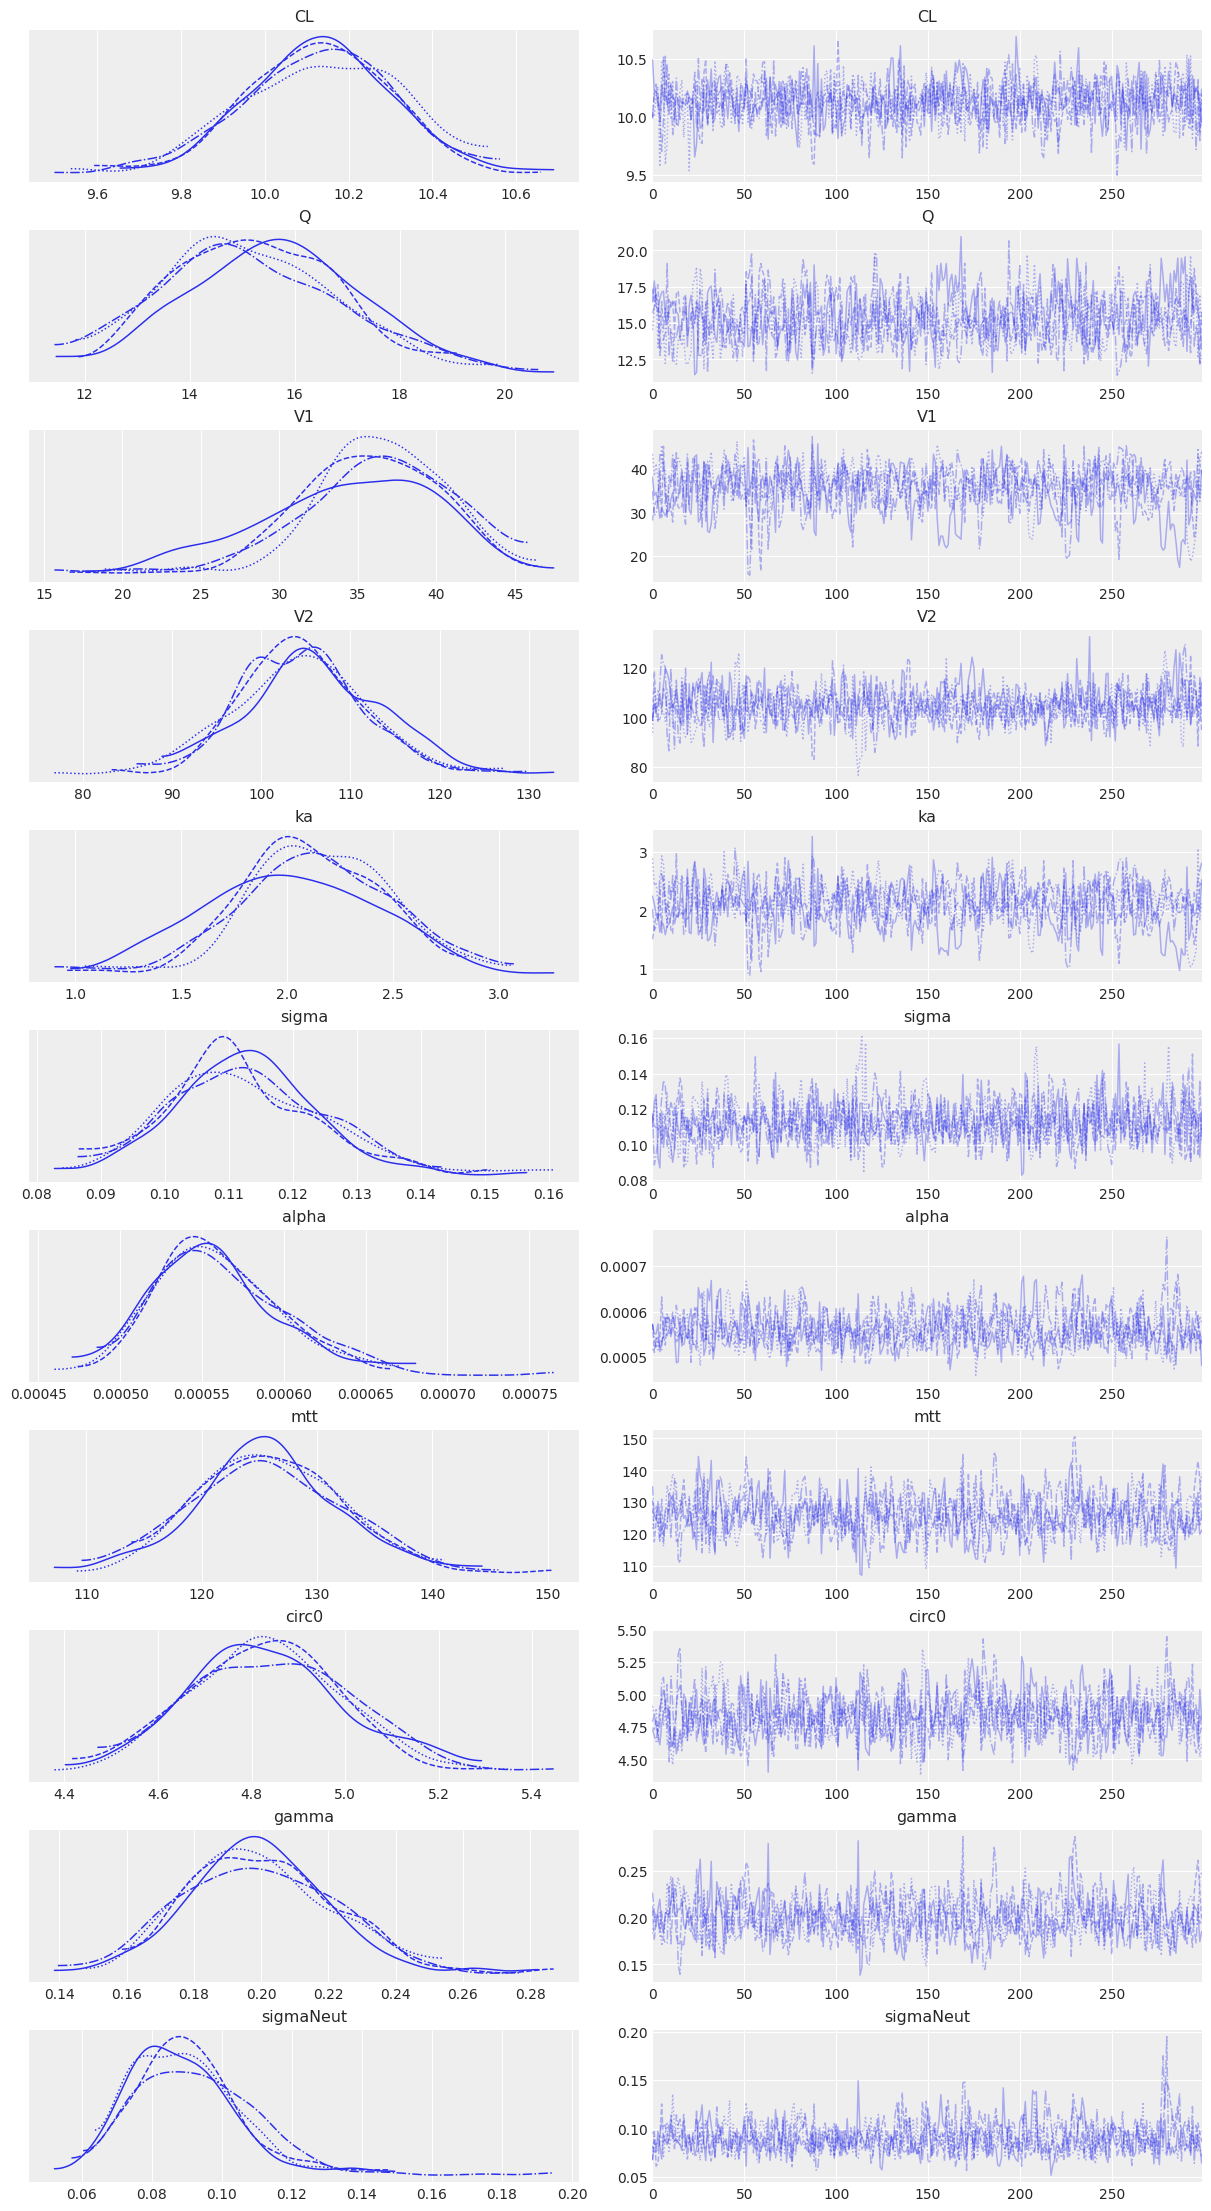

In [8]:
az.plot_trace(chains.posterior, var_names=list(init.keys()));

/home/tng/.local/lib/python3.9/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/tng/.local/lib/python3.9/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/tng/.local/lib/python3.9/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/tng/.local/lib/python3.9/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/home/tng/.local/lib/python3.9/site-packages/arviz/stats/density_uti

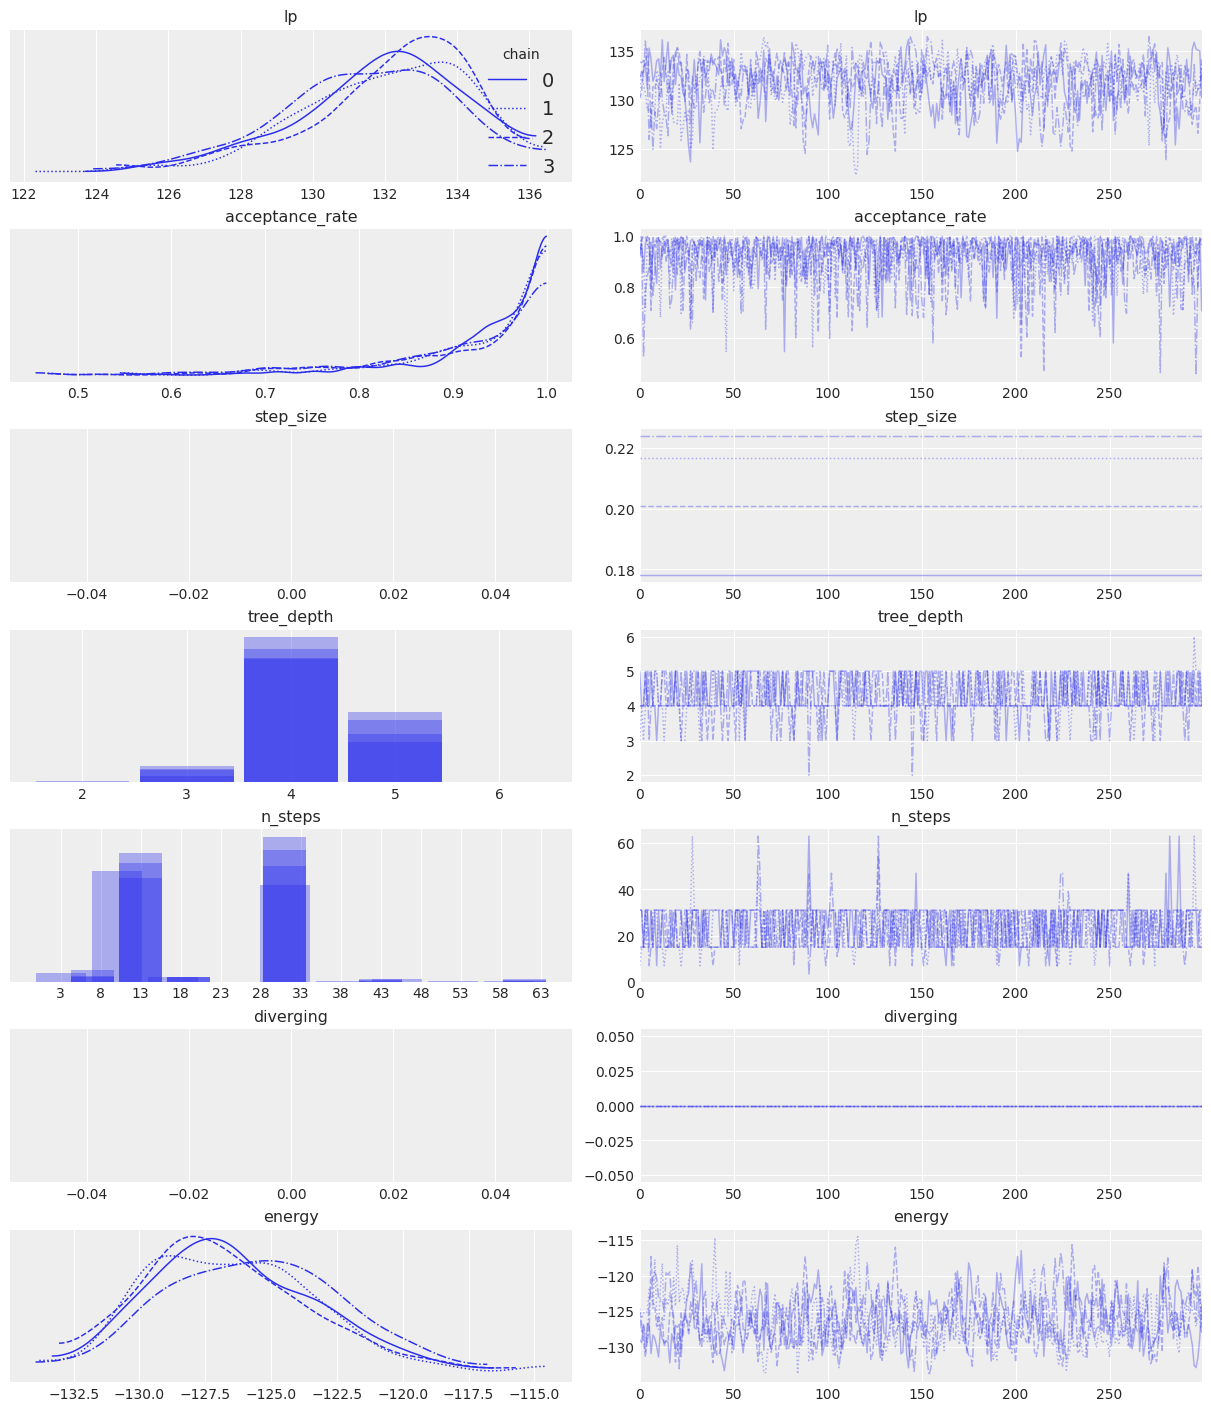

In [12]:
az.plot_trace(chains.sample_stats, legend=True) ;

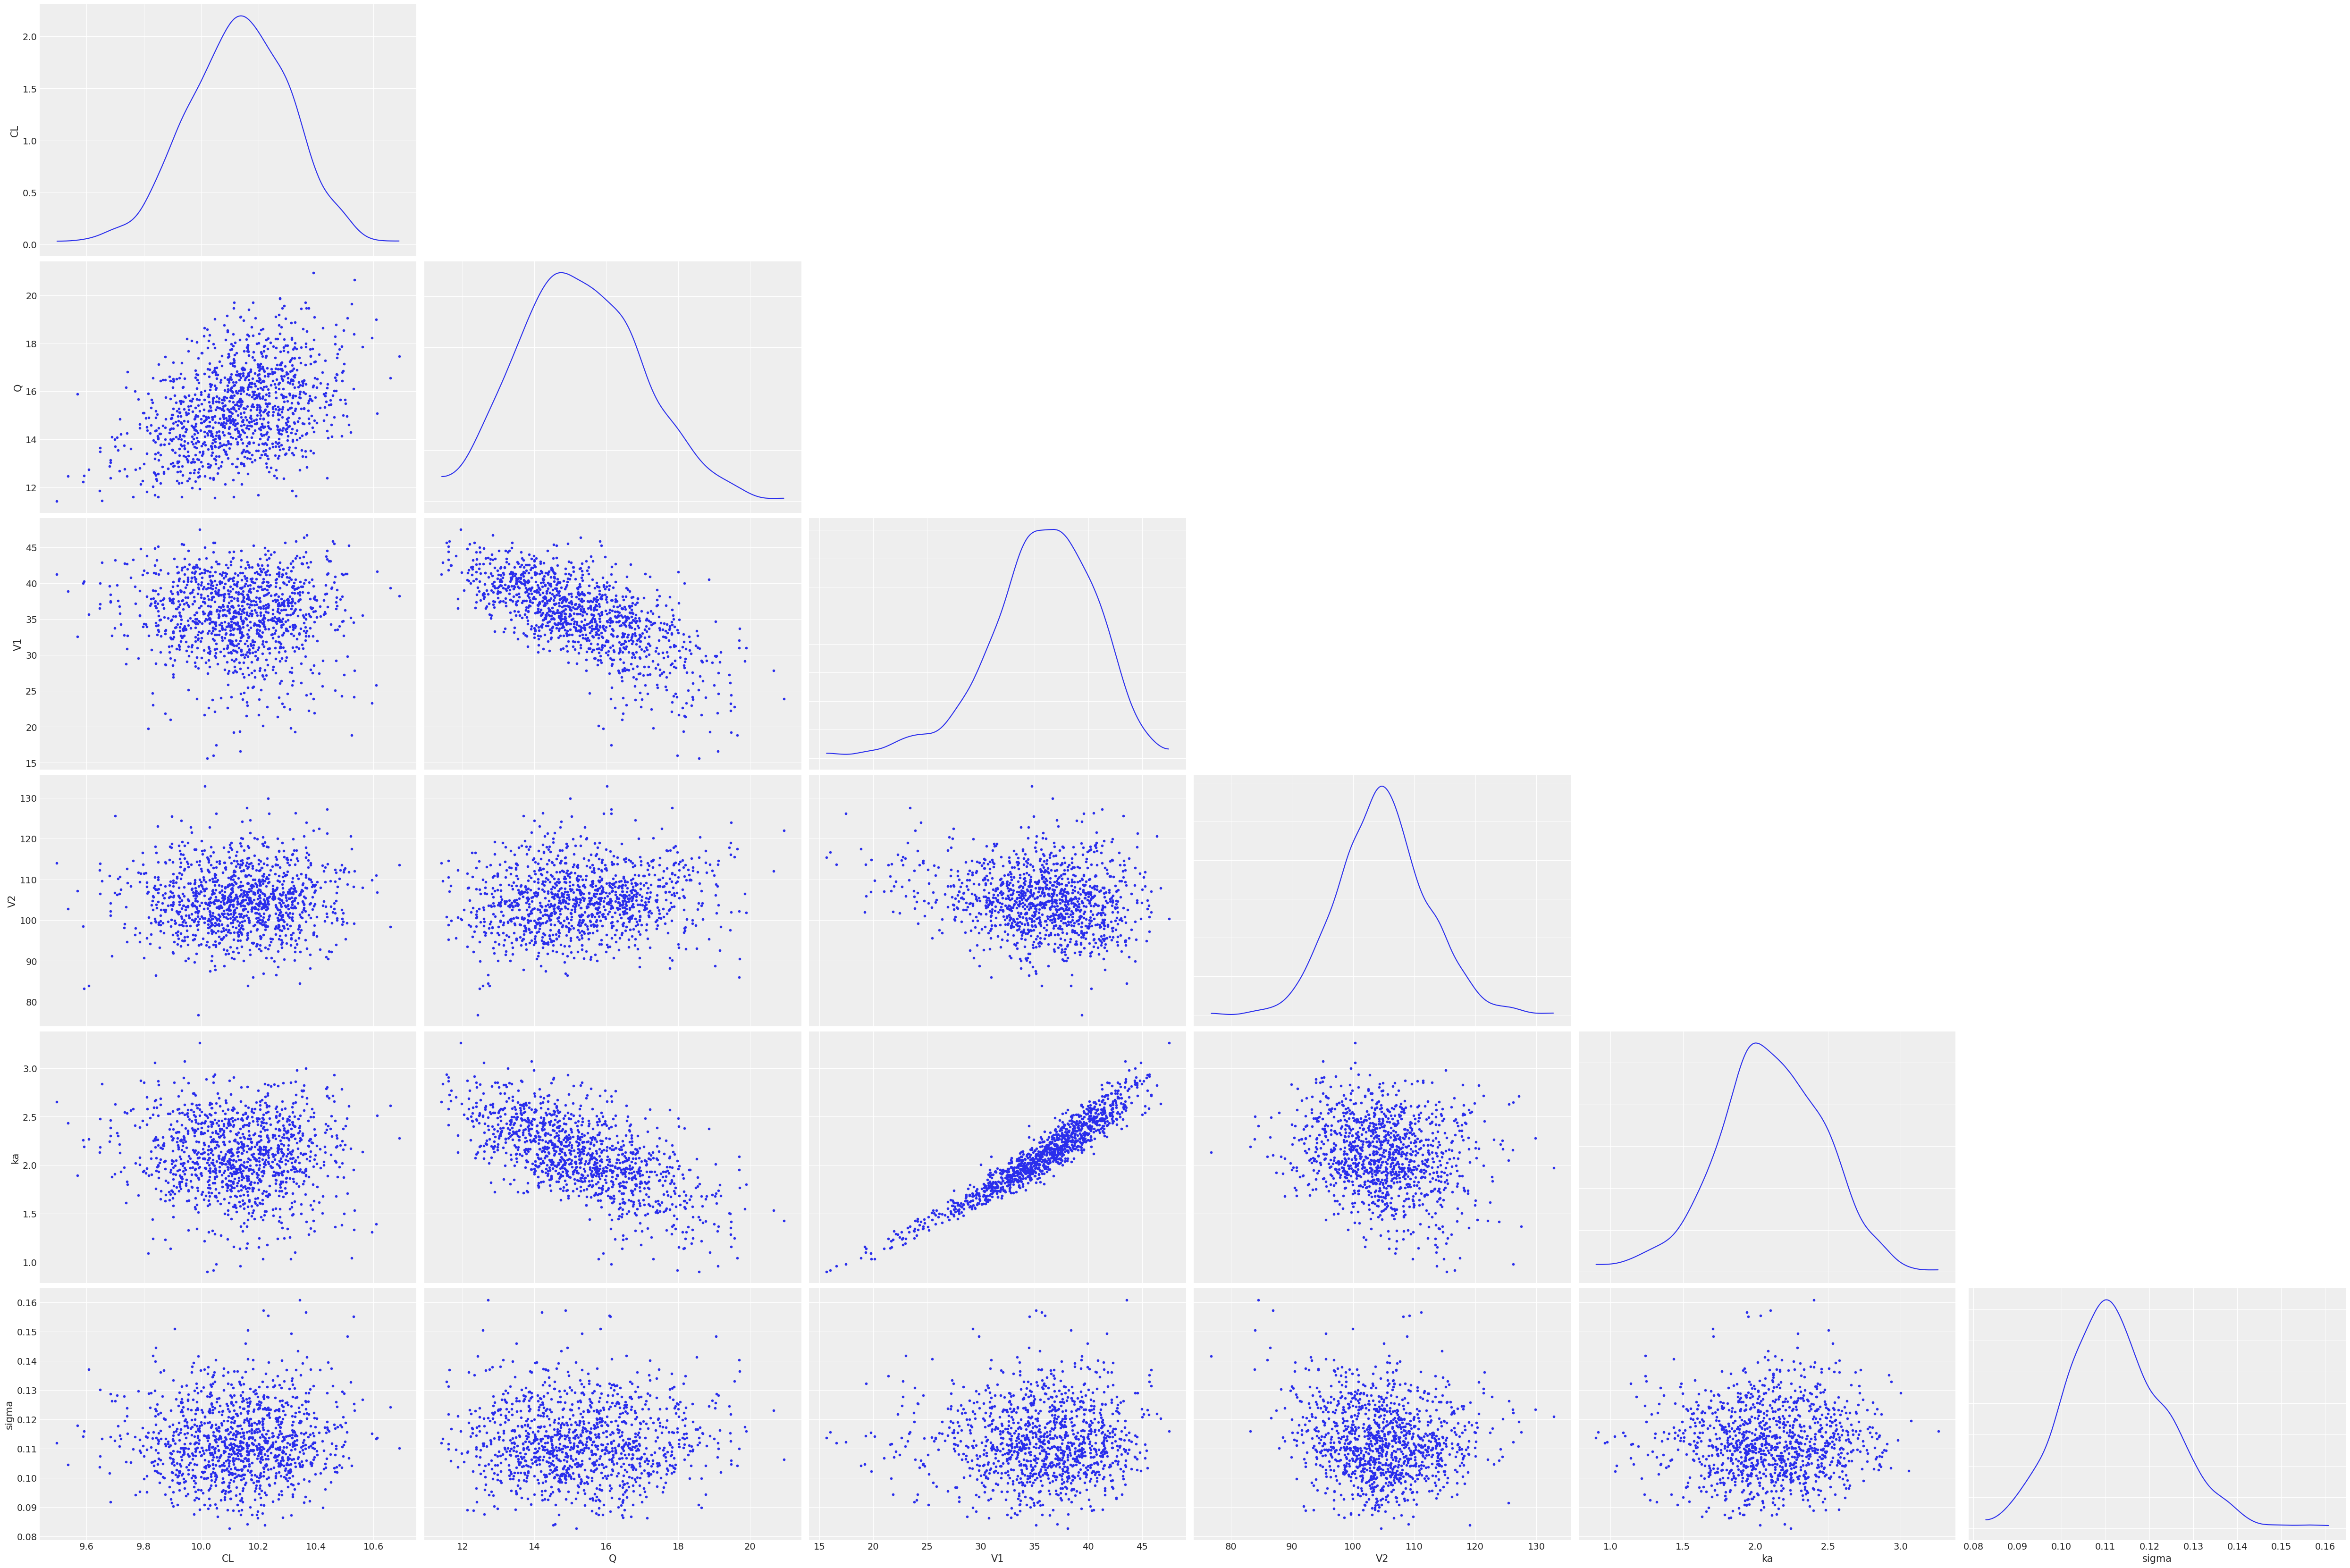

In [13]:
az.plot_pair(chains, var_names=list(init.keys())[:6], kind=["scatter"], marginals=True);

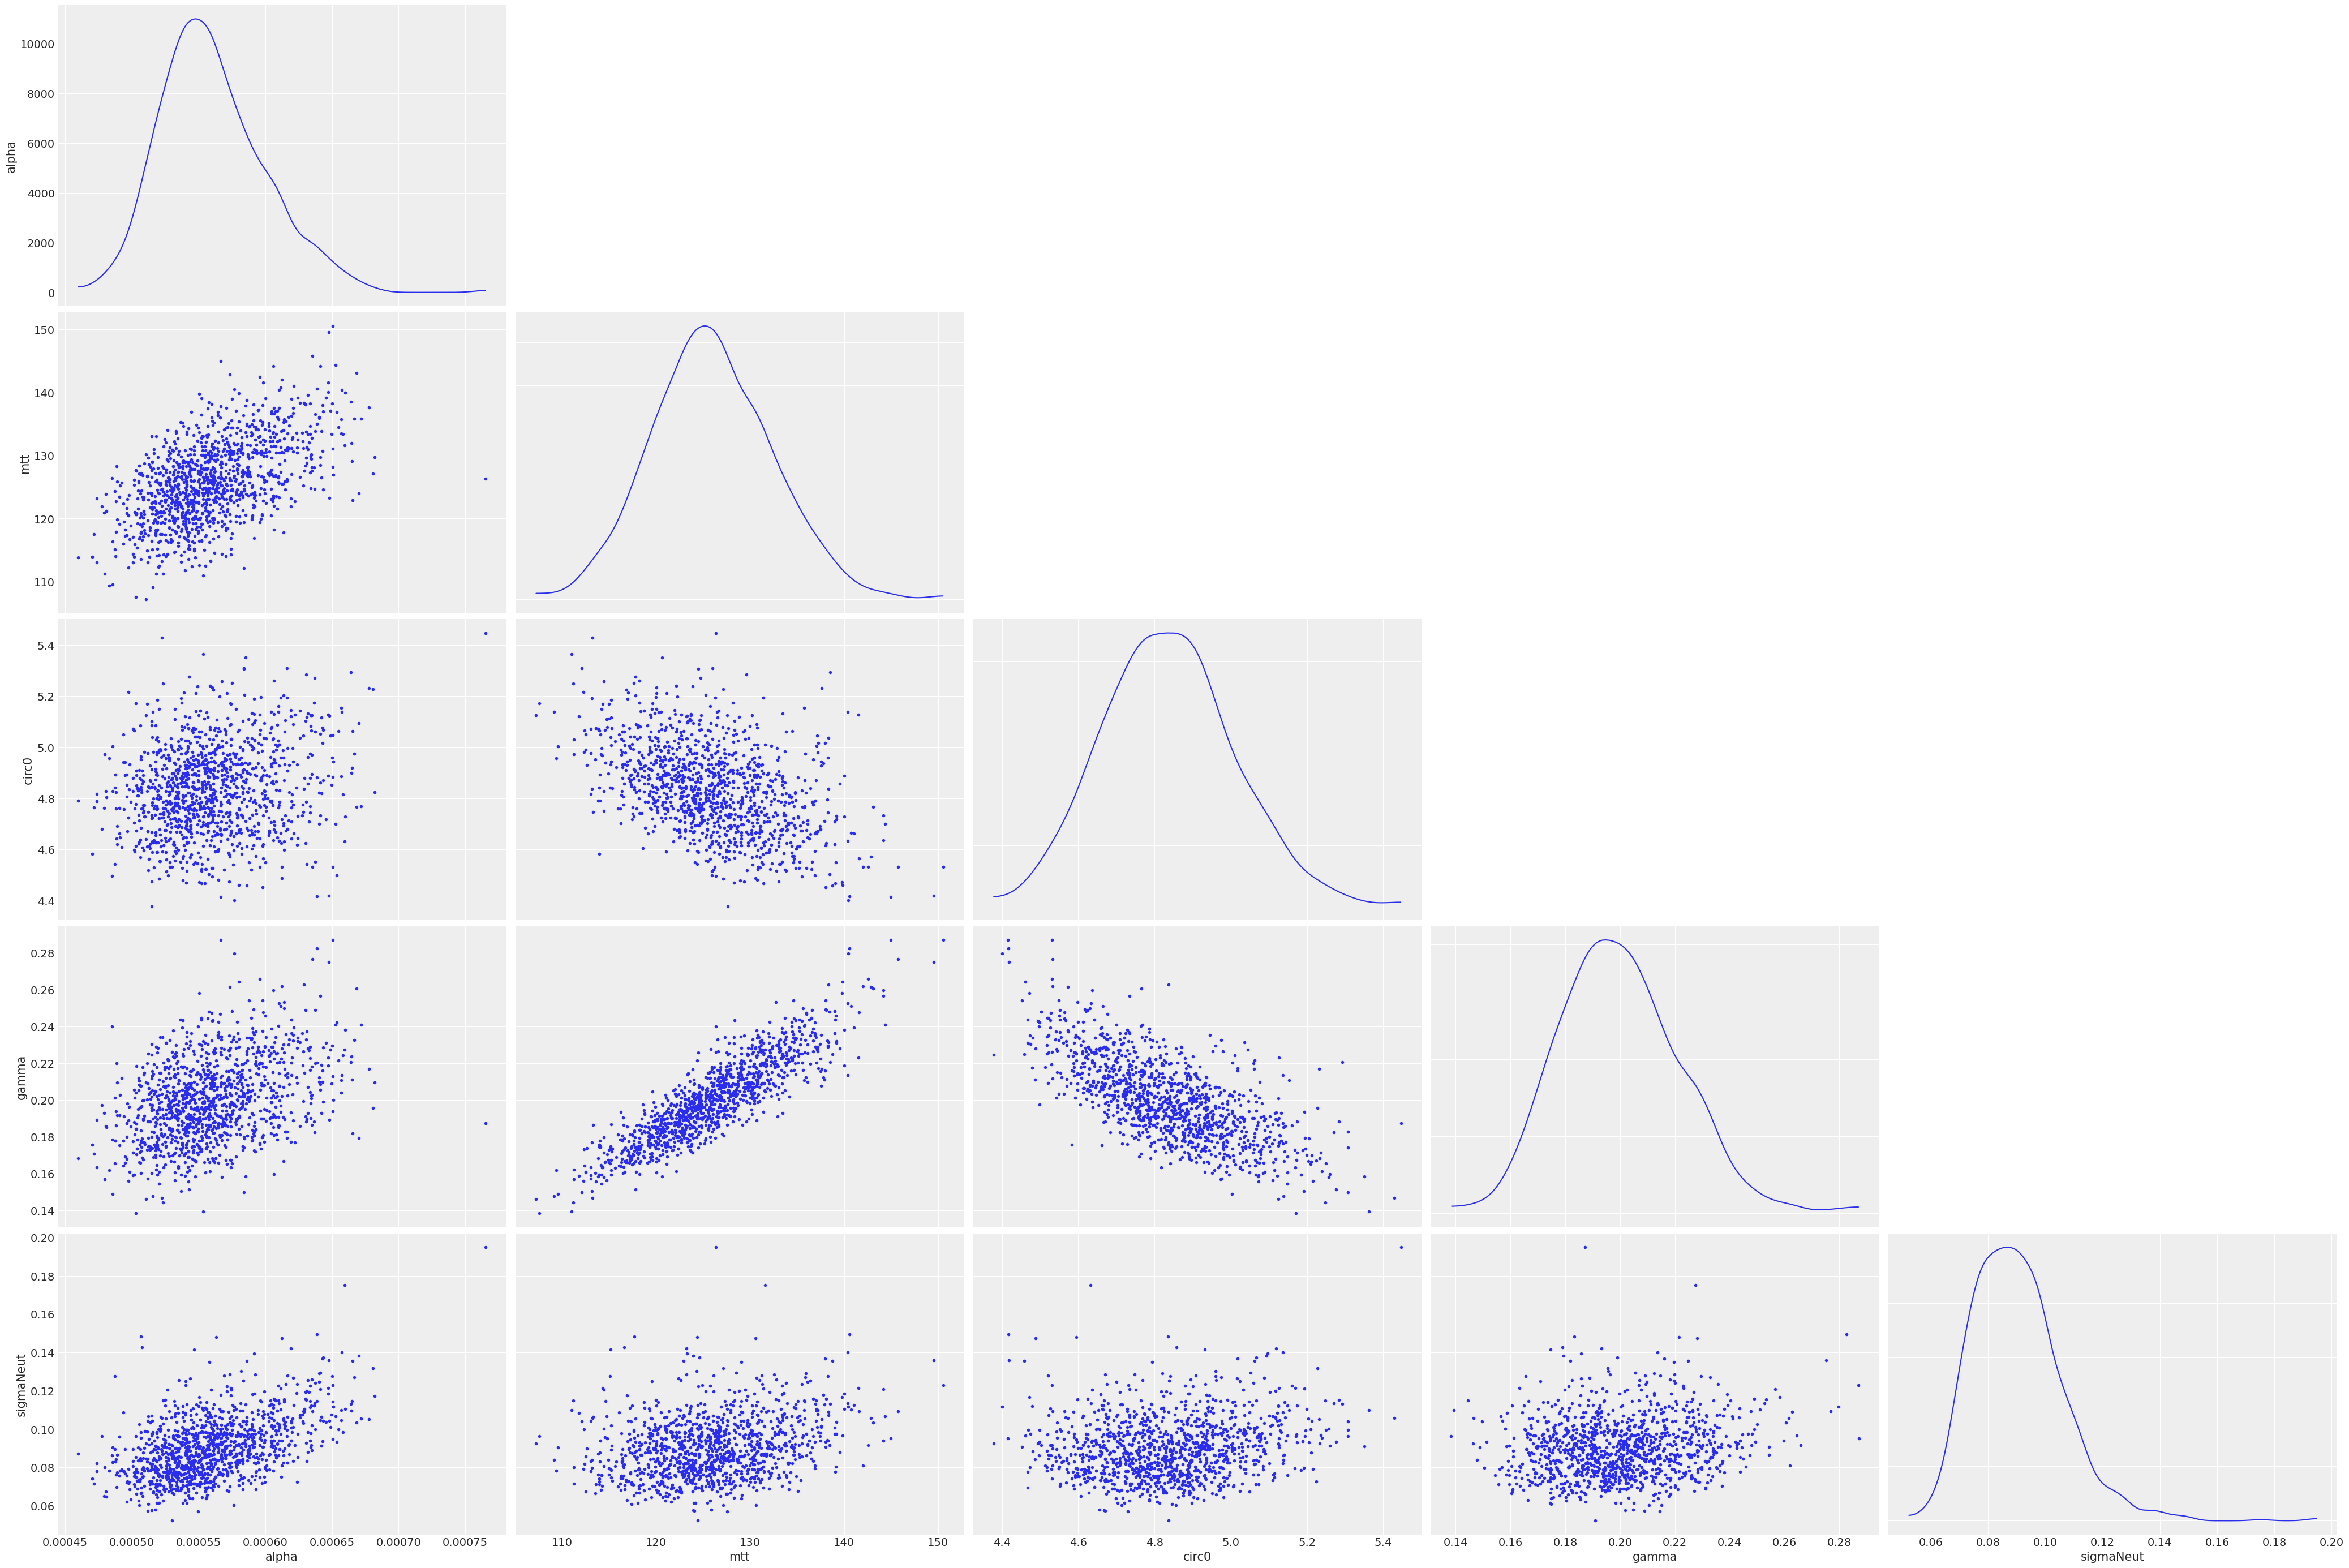

In [14]:
az.plot_pair(chains, var_names=list(init.keys())[6:], kind=["scatter"], marginals=True);

## Posterior predictive checks

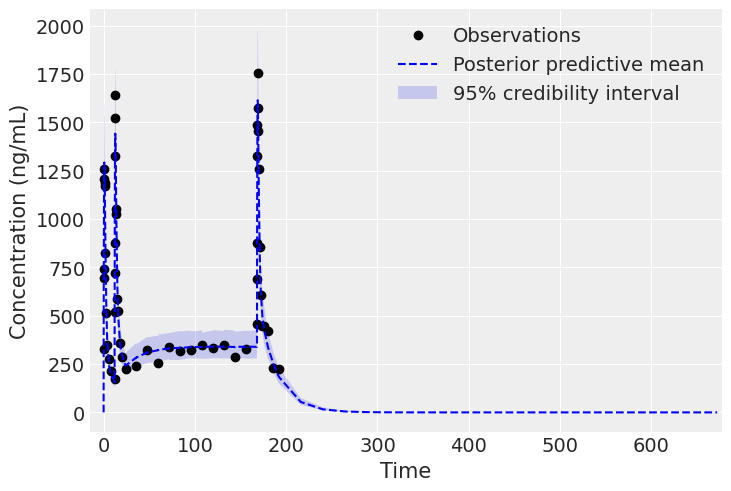

In [15]:
iObsPK = chains.observed_data['iObsPK'].astype('int')
t = chains.observed_data['time']
tcObs = t[iObsPK-1]
cObs = chains.observed_data['cObs']
cPred = chains.posterior_predictive['cPred']

plt.plot(tcObs, cObs, 'ok',  label='Observations')
plt.plot(t, cPred.mean(axis=1).mean(axis=0), '--b', label='Posterior predictive mean')

qlow = np.quantile(cPred, 0.025, axis=[0,1])
qhigh = np.quantile(cPred, 0.975, axis=[0,1])
plt.fill_between(t, qlow, qhigh, alpha=0.2, label='95% credibility interval')

plt.xlim([t[0]-15, t[-1]+5])
plt.ylabel('Concentration (ng/mL)')
plt.xlabel('Time')
plt.legend()
plt.show()

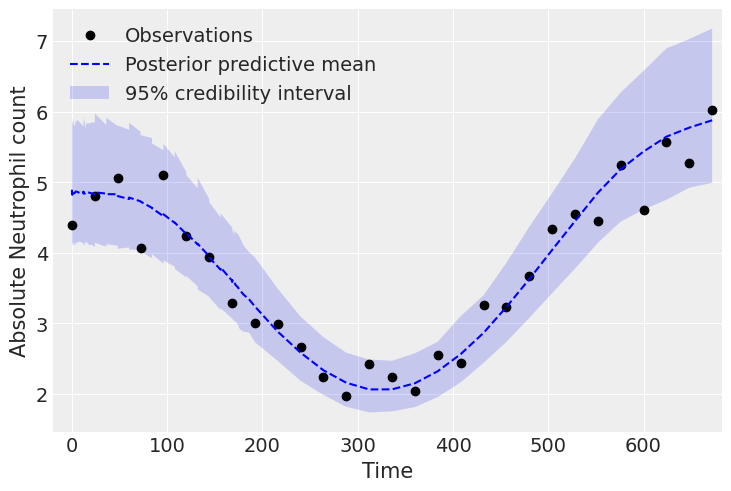

In [16]:
iObsPD = chains.observed_data['iObsPD'].astype('int')
t = chains.observed_data['time']
tneutObs = t[iObsPD-1]
neutObs = chains.observed_data['neutObs']
neutPred = chains.posterior_predictive['neutPred']

plt.plot(tneutObs, neutObs, 'ok',  label='Observations')
plt.plot(t, neutPred.mean(axis=1).mean(axis=0), '--b', label='Posterior predictive mean')

qlow = np.quantile(neutPred, 0.025, axis=[0,1])
qhigh = np.quantile(neutPred, 0.975, axis=[0,1])
plt.fill_between(t, qlow, qhigh, alpha=0.2, label='95% credibility interval')

plt.xlim([t[0]-20, t[-1]+10])
plt.ylabel('Absolute Neutrophil count')
plt.xlabel('Time')
plt.legend()
plt.show()